In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Amostras foram obtidas de 3 máquinas de envase de perfume, conforme exibido a seguir. \
m1 = 150, 151, 152, 152, 151, 150 \
m2 = 153, 152, 148, 151, 149, 152 \
m3 = 156, 154, 155, 156, 157, 155 \
Com base nessas amostras, é correto afirmar que as 3 máquinas estão operando de forma idêntica, ou seja, produzindo perfumes com a mesma média? Nível de confiança: 95%.

H0: μ1 = μ2 = μ3 \
Ha: Médias não são iguais

In [2]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [3]:
stats.f_oneway(m1, m2, m3)

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

Resposta \
Como pValue < 0.05, rejeitamos a H0. Portanto, as médias não são iguais.

É possível também obter a solução deste problema usando a biblioteca statsmodels. Vejamos como proceder.

In [4]:
import statsmodels.stats.oneway as oneway
oneway.anova_oneway([m1, m2, m3], use_var='equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

As duas opções produzem resultados idênticos, porém o statsmodels provê um resultado mais detalhado.

### Exercício 1: MPG
Usaremos o dataset mpg (miles per galon) do seaborn. Queremos descobrir se carros americanos, japoneses e europeus tem o mesmo consumo. Faremos um teste de hipótese com confiança de 95%.

H0: μus = μjp = μeu \
Ha: Médias não são iguais

In [5]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Queremo saber se os carros japoneses, americanos e europeus tem o mesmo consumo de combustível. Para tanto, precisamos agrupar os veículos por origem e obter a média de mpg (miles per galon).

In [8]:
df.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

Vamos plotar boxplots de mpg e observar o resultado.

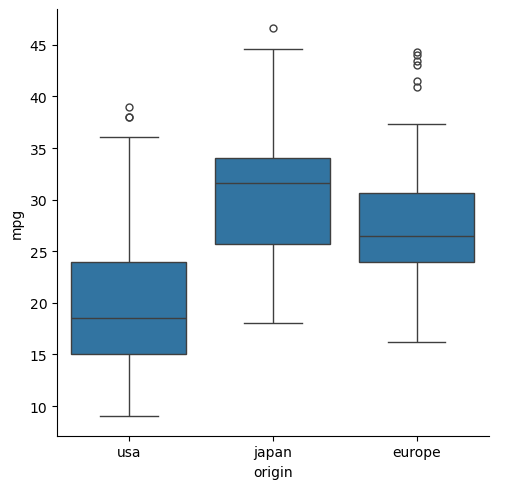

In [9]:
sns.catplot(data=df, x='origin', y='mpg', kind='box')
plt.show()

Analisando os resultados, está claro que os carros japoneses são os mais econômicos e os carros americanos, os mais gastões. Mas notem o número de cilindros. Os carros americanos tem, em média, muito mais cilindros que os carros europeus e japoneses. Para evitar esse viés, vamos trabalhar apenas com os veículos de 4 cilindros.

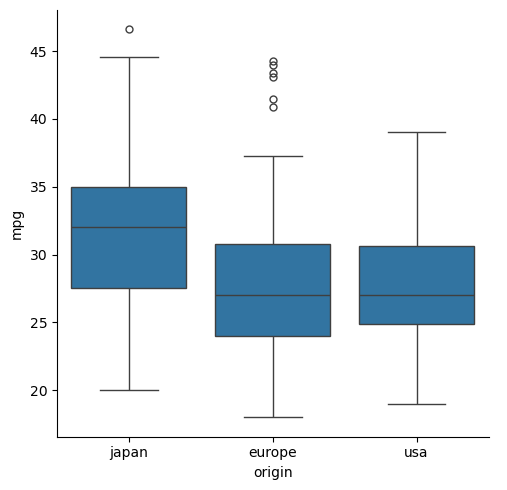

In [11]:
df2 = df[df['cylinders'] == 4]
sns.catplot(data = df2, x='origin', y='mpg', kind='box')
plt.show()

Ao considerar carros de 4 cilindros, ainda temos os carros japoneses como mais econômicos, porém vemos uma quase igualdade entre os carros americanos e europeus. Vamos realizar o teste ANOVA para saber se temos de fato uma diferença nas médias de consumo.

In [16]:
eu = df2[df2['origin'] == 'europe']['mpg']
jp = df2[df2['origin'] == 'japan']['mpg']
us = df2[df2['origin'] == 'usa']['mpg']

In [17]:
stats.f_oneway(eu, jp, us)

F_onewayResult(statistic=9.411845545485601, pvalue=0.00012379894210177303)

Resposta \
Temos um pValue < 0.05, portanto rejeitamos a H0. A média de consumo dos carros americanos, japoneses e europeus **não** é a mesma.

### Exercício 2
Uma pediatra quer ver o efeito do consumo de fórmula (leite em pó) no ganho médio de peso mensal (em gramas) dos bebês. Por esse motivo, ela coletou dados de três grupos diferentes. O primeiro grupo é composto por crianças amamentadas exclusivamente (recebe apenas leite materno), o segundo grupo é composto por crianças que são alimentadas apenas com fórmula e o último grupo é composto por crianças amamentadas e com fórmula. Esses dados são os seguintes.

leite_materno = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]

formula = [ 898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9]

ambos = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3]

Realize um teste de hipótese e informe se há diferença no peso médio das crianças desses 3 grupos. Nível de cofiança de 95%.

H0: μleite_materno = μformula = μambos \
Ha: Médias não são iguais

In [19]:
leite_materno = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]
formula = [ 898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9]
ambos = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3]

stats.f_oneway(leite_materno, formula, ambos)

F_onewayResult(statistic=26.701251857537958, pvalue=7.18623550288582e-09)

In [20]:
oneway.anova_oneway([leite_materno, formula, ambos], use_var='equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 26.70125185753803
pvalue = 7.186235502885558e-09
df = (2.0, 56.0)
df_num = 2.0
df_denom = 56.0
nobs_t = 59.0
n_groups = 3
means = array([749.82352941, 959.21578947, 809.95217391])
nobs = array([17., 19., 23.])
vars_ = array([10405.44066176,  7949.32807018,  6377.54715415])
use_var = 'equal'
welch_correction = True
tuple = (26.70125185753803, 7.186235502885558e-09)

Como pValue < 0.05, rejeitamos a H0. Portanto, **há sim** uma diferença no peso médio entre as crianças dos 3 grupos.